In [ ]:
import json
import zipfile
import pandas as pd
import os
import kagglehub
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print("Path to dataset files:", path)
api_token={"username":"fgh22651","key":"cb153551d4319ef76099b9970966e688"}
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset --force

!ls /kaggle
with zipfile.ZipFile('/kaggle/sleep-health-and-lifestyle-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle')

Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2
Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 5.21MB/s]
Sleep_health_and_lifestyle_dataset.csv	TaipeiSansTCBeta-Regular.ttf
sleep-health-and-lifestyle-dataset.zip


In [ ]:
import pandas as pd
import numpy as np

def convert_to_categories(train_df):
    """
    將連續性變數轉換為類別變數
    """
    train_df = pd.read_csv('/kaggle/Sleep_health_and_lifestyle_dataset.csv')
    df_cat = train_df.copy()
    #年齡
    # Age (27-59歲)
    df_cat['年齡']      = pd.cut(df_cat['Age'],           bins=[0, 35, 45, 60],   labels=['青年(27-35)', '中年(36-45)', '壯年(46-59)'])

    #睡眠時間
    # Sleep Duration (5.8-8.5小時)
    df_cat['睡眠時間'] = pd.cut(df_cat['Sleep Duration'],     bins=[0, 6, 7.5, 9],   labels=['睡眠不足(<6h)', '正常(6-7.5h)', '充足(>7.5h)'])

    #睡眠品質
    # Quality of Sleep (4-9分)
    df_cat['睡眠品質'] = pd.cut(df_cat['Quality of Sleep'],    bins=[0, 5, 7, 10],    labels=['差(1-5)', '中等(6-7)', '良好(8-9)'])

    #該人每天進行體力活動的分鐘數
    # Physical Activity Level (30-90分鐘)
    df_cat['每天進行體力活動']    = pd.cut(df_cat['Physical Activity Level'],bins=[0, 45, 75, 100],  labels=['低度活動(<45min)', '中度活動(45-75min)', '高度活動(>75min)'])

    #人所經歷的壓力程度的主觀評分
    # Stress Level (3-8分)
    df_cat['壓力程度']     = pd.cut(df_cat['Stress Level'],      bins=[0, 4, 6, 10],    labels=['輕度壓力(1-4)', '中度壓力(5-6)', '重度壓力(7-8)'])

    #該人的血壓
    # Blood Pressure (117/76-140/90)
    def categorize_bp(bp_string):
        systolic = int(bp_string.split('/')[0])
        if systolic < 120:
            return '正常血壓(<120)'
        elif systolic < 130:
            return '血壓偏高(120-129)'
        else:
            return '高血壓(≥130)'

    df_cat['血壓'] = df_cat['Blood Pressure'].apply(categorize_bp)

    #該人的心率
    # Heart Rate (65-86次/分)
    df_cat['心率'] = pd.cut(df_cat['Heart Rate'],bins=[0, 70, 80, 200], labels=['偏慢(<70)', '正常(70-80)', '偏快(>80)'])

    #該人每日所走步數
    # Daily Steps (3000-10000步)
    df_cat['每日所走步數'] = pd.cut(df_cat['Daily Steps'], bins=[0, 5000, 7500, 15000], labels=['低度活動(<5000)', '中度活動(5000-7500)', '高度活動(>7500)'])

    Gender_mapping = {'Male': '男', 'Female': '女'}
    df_cat['性別'] = train_df['Gender'].map(Gender_mapping)

    Occupation_mapping = {'Doctor':'醫生','Nurse':'護士', 'Engineer':'工程師','Software Engineer':'軟體工程師', 'Teacher':'老師', 'Sales Representative':'銷售','Accountant':'會計', 'Scientist':'科學家'}
    df_cat['職業'] = train_df['Occupation'].map(Occupation_mapping)

    BMI_Category_mapping = {'Normal': '正常', 'Normal Weight': '普通重','Overweight':'超重','Obese':'肥胖'}
    df_cat['BMI分類'] = train_df['BMI Category'].map(BMI_Category_mapping)

    sleep_disorder_mapping = {'Sleep Apnea': '呼吸中止症', 'Insomnia': '失眠症'}
    df_cat['睡眠障礙'] = train_df['Sleep Disorder'].map(sleep_disorder_mapping).fillna('無睡眠障礙')
    return df_cat

In [ ]:
df_categorical=convert_to_categories(train_df)
df_categorical=df_categorical.drop(columns=['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Blood Pressure','Heart Rate','Daily Steps','BMI Category','Occupation','Gender','Sleep Disorder'])
df_categorical

,Person ID,年齡,睡眠時間,睡眠品質,每天進行體力活動,壓力程度,血壓,心率,每日所走步數,性別,職業,BMI分類,睡眠障礙
0,1,青年(27-35),正常(6-7.5h),中等(6-7),低度活動(<45min),中度壓力(5-6),血壓偏高(120-129),正常(70-80),低度活動(<5000),男,軟體工程師,超重,無睡眠障礙
1,2,青年(27-35),正常(6-7.5h),中等(6-7),中度活動(45-75min),重度壓力(7-8),血壓偏高(120-129),正常(70-80),高度活動(>7500),男,醫生,正常,無睡眠障礙
2,3,青年(27-35),正常(6-7.5h),中等(6-7),中度活動(45-75min),重度壓力(7-8),血壓偏高(120-129),正常(70-80),高度活動(>7500),男,醫生,正常,無睡眠障礙
3,4,青年(27-35),睡眠不足(<6h),差(1-5),低度活動(<45min),重度壓力(7-8),高血壓(≥130),偏快(>80),低度活動(<5000),男,銷售,肥胖,呼吸中止症
4,5,青年(27-35),睡眠不足(<6h),差(1-5),低度活動(<45min),重度壓力(7-8),高血壓(≥130),偏快(>80),低度活動(<5000),男,銷售,肥胖,呼吸中止症
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,壯年(46-59),充足(>7.5h),良好(8-9),中度活動(45-75min),輕度壓力(1-4),高血壓(≥130),偏慢(<70),中度活動(5000-7500),女,護士,超重,呼吸中止症
370,371,壯年(46-59),充足(>7.5h),良好(8-9),中度活動(45-75min),輕度壓力(1-4),高血壓(≥130),偏慢(<70),中度活動(5000-7500),女,護士,超重,呼吸中止症
371,372,壯年(46-59),充足(>7.5h),良好(8-9),中度活動(45-75min),輕度壓力(1-4),高血壓(≥130),偏慢(<70),中度活動(5000-7500),女,護士,超重,呼吸中止症
372,373,壯年(46-59),充足(>7.5h),良好(8-9),中度活動(45-75min),輕度壓力(1-4),高血壓(≥130),偏慢(<70),中度活動(5000-7500),女,護士,超重,呼吸中止症


In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')


--2024-11-25 14:43:17--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.126.138, 74.125.126.101, 74.125.126.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.126.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-11-25 14:43:17--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c56::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-11-25 14:43:

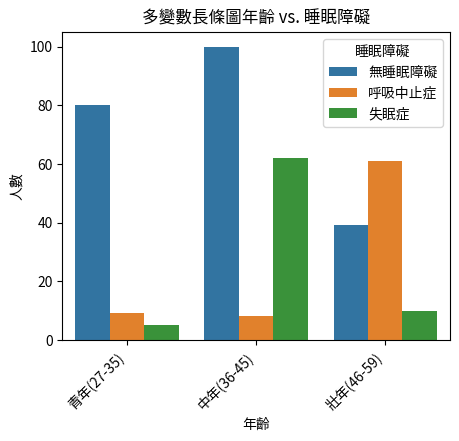

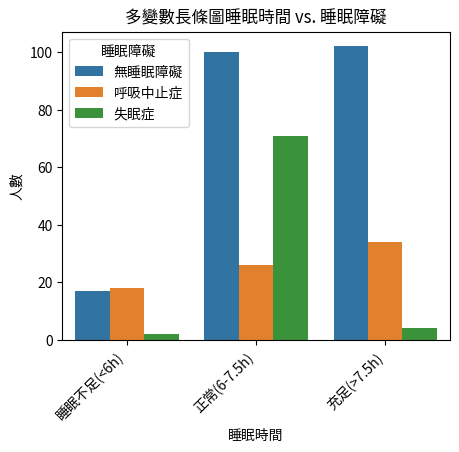

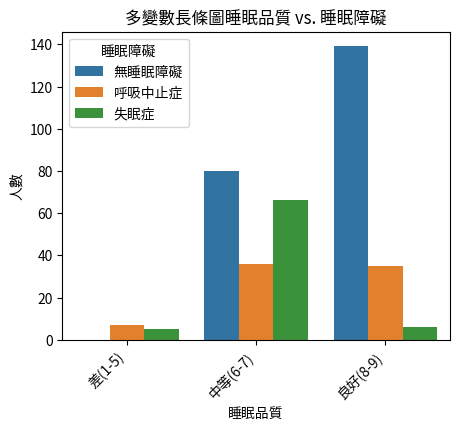

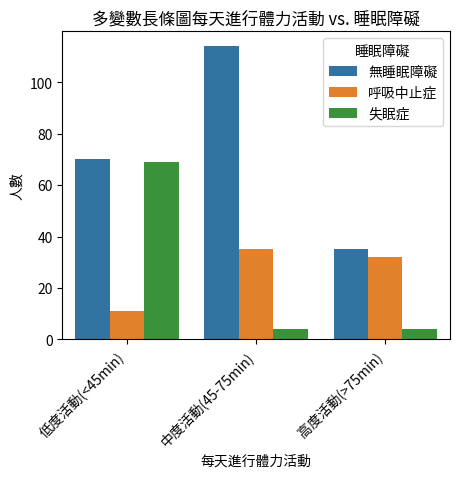

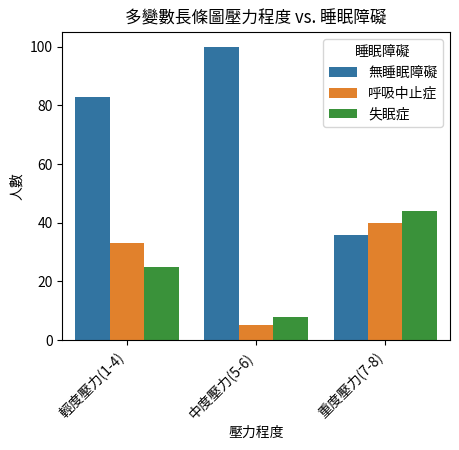

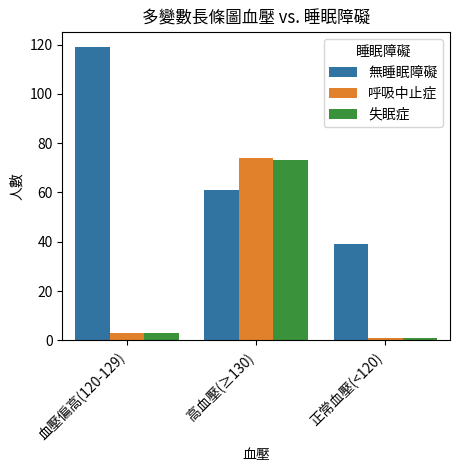

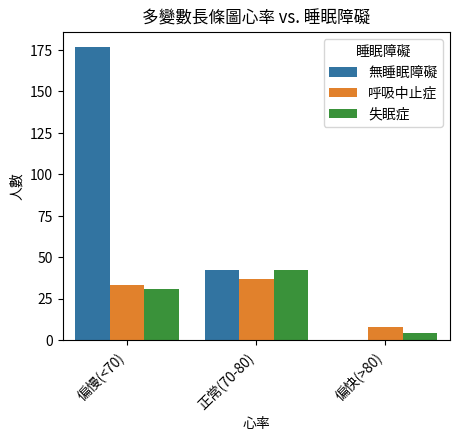

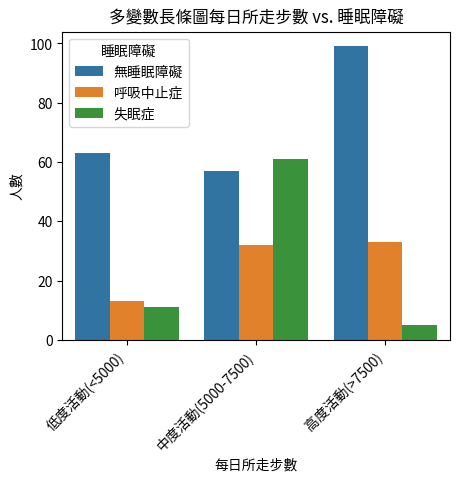

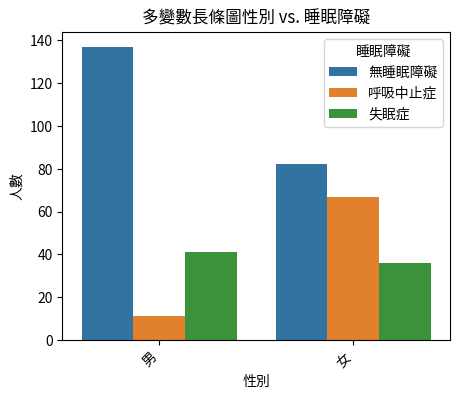

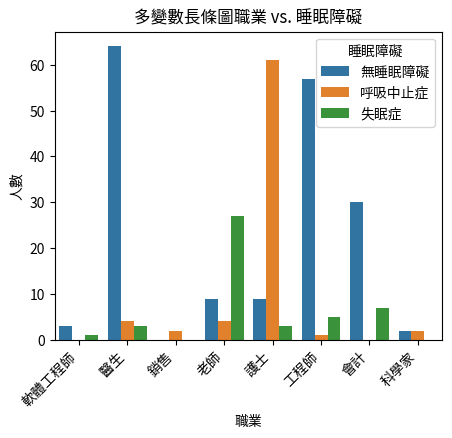

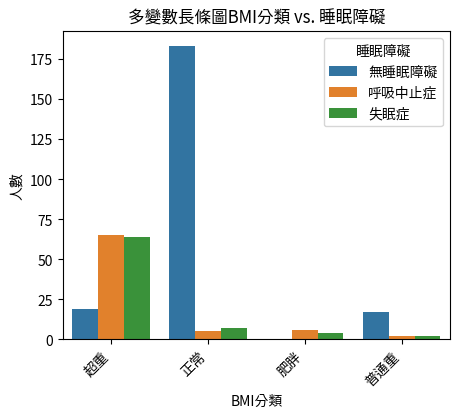

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_categorical.columns:
    if column not in ['Person ID', '睡眠障礙']:
        plt.figure(figsize=(5, 4))
        sns.countplot(x=column, hue='睡眠障礙', data=df_categorical)
        plt.title(f'多變數長條圖{column} vs. 睡眠障礙')
        plt.xlabel(column)
        plt.ylabel('人數')
        plt.xticks(rotation=45, ha='right')
        plt.show()

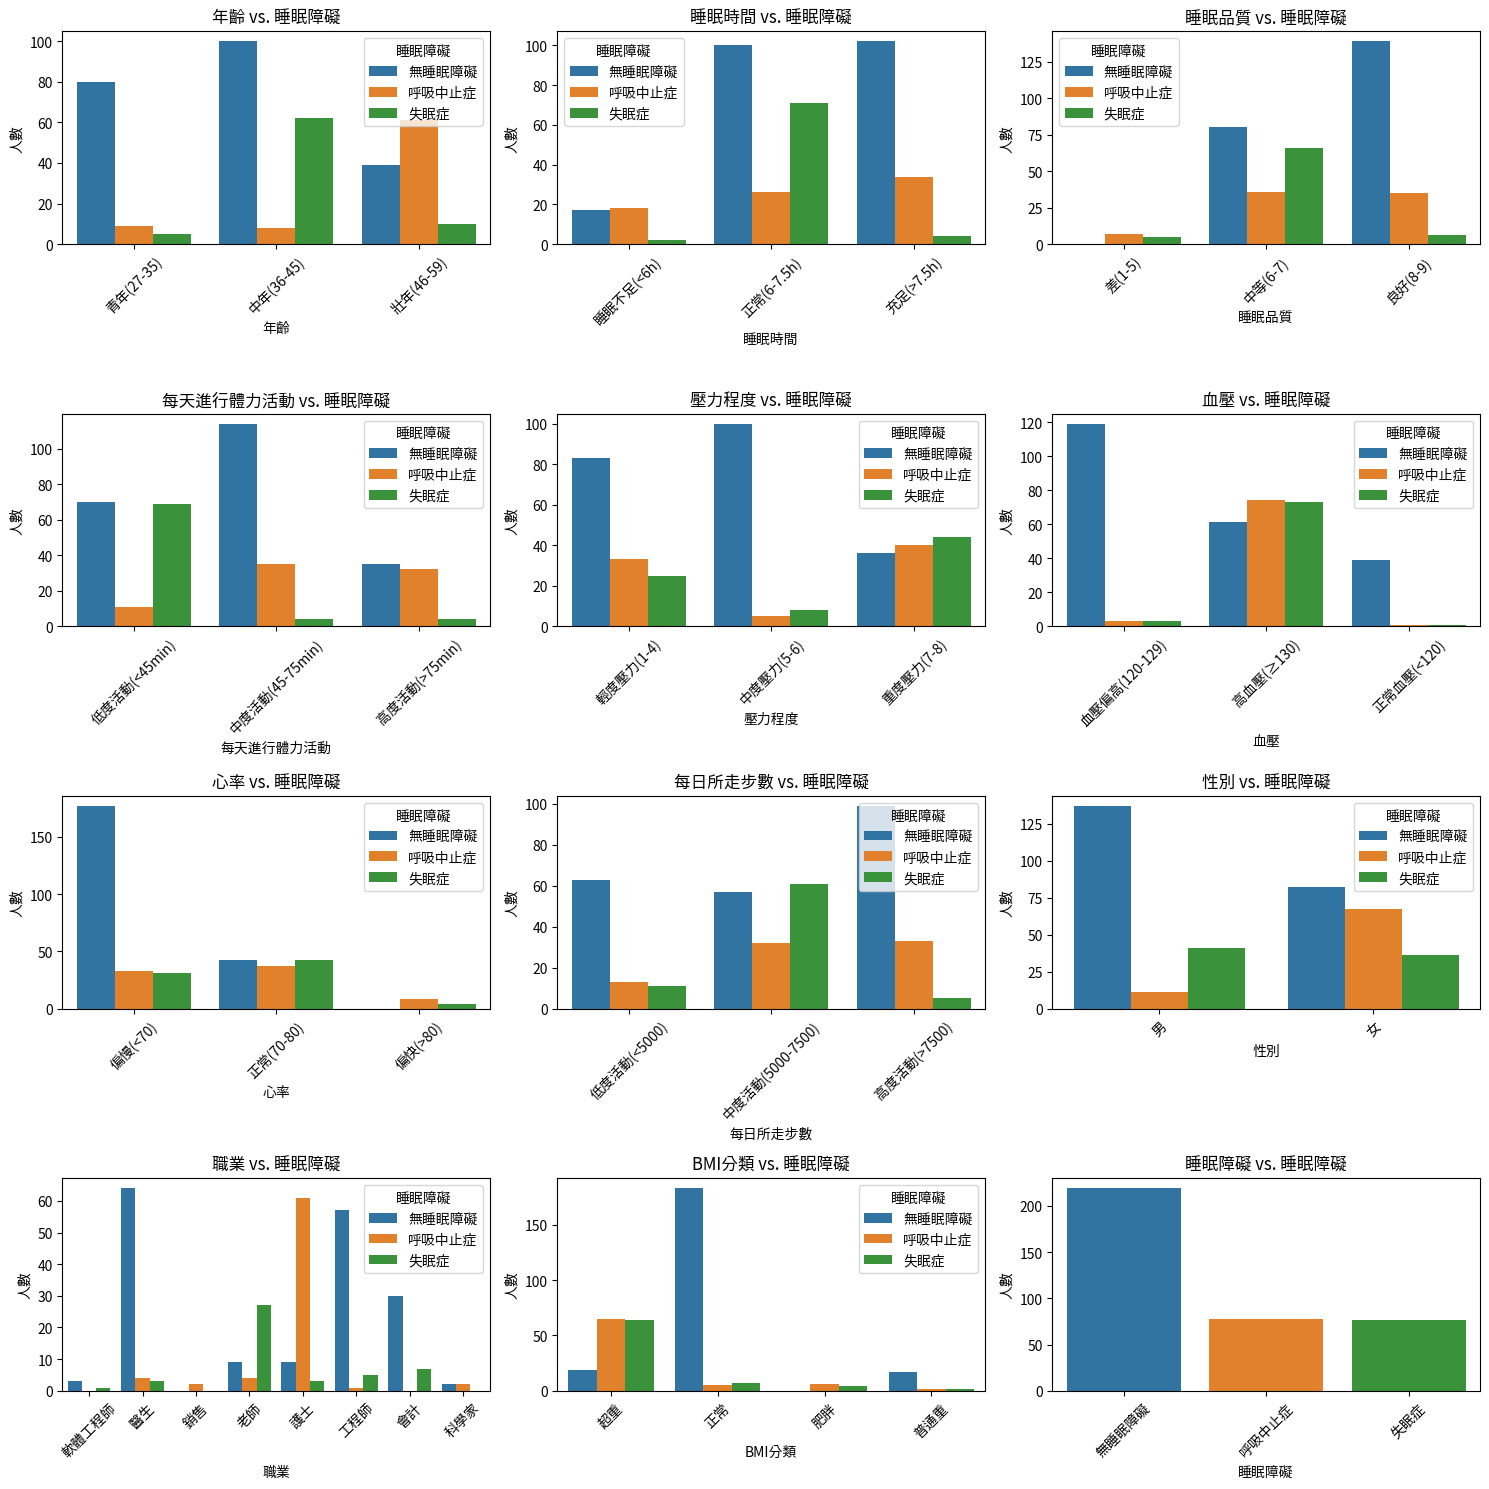

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_comparison(df_categorical):
    categorical_columns = df_categorical.drop(columns=['Person ID'])

    fig, axes = plt.subplots(4, 3, figsize=(15, 15))
    axes = axes.ravel()

    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, hue='睡眠障礙', data=df_categorical, ax=axes[i])
        axes[i].set_title(f'{column} vs. 睡眠障礙')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('人數')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1,12):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_categorical_comparison(df_categorical)

In [ ]:
# 統計分析連續型變數的平均值 中位數 標準差
continuous_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level','Heart Rate', 'Daily Steps']
for var in continuous_vars:
  print(f"統計分析 {var}:")
  print(f"  平均值: {train_df[var].mean()}")
  print(f"  中位數: {train_df[var].median()}")
  print(f"  標準差: {train_df[var].std()}")
  print("-" * 20)
# 將連續型變數標準化
import pandas as pd
from sklearn.preprocessing import StandardScaler
sleep_disorder_mapping = {'Sleep Apnea': '1', 'Insomnia': '2'}
train_df['Sleep Disorder'] = train_df['Sleep Disorder'].map(sleep_disorder_mapping).fillna('0')
scaler = StandardScaler()
train_df[continuous_vars] = scaler.fit_transform(train_df[continuous_vars])
print(train_df['Sleep Disorder'].value_counts())

統計分析 Age:
  平均值: 42.18449197860963
  中位數: 43.0
  標準差: 8.67313346554724
--------------------
統計分析 Sleep Duration:
  平均值: 7.132085561497325
  中位數: 7.2
  標準差: 0.7956567308898188
--------------------
統計分析 Quality of Sleep:
  平均值: 7.31283422459893
  中位數: 7.0
  標準差: 1.1969559197336044
--------------------
統計分析 Physical Activity Level:
  平均值: 59.17112299465241
  中位數: 60.0
  標準差: 20.830803658071673
--------------------
統計分析 Stress Level:
  平均值: 5.385026737967914
  中位數: 5.0
  標準差: 1.7745264441985167
--------------------
統計分析 Heart Rate:
  平均值: 70.16577540106952
  中位數: 70.0
  標準差: 4.135675535112214
--------------------
統計分析 Daily Steps:
  平均值: 6816.844919786096
  中位數: 7000.0
  標準差: 1617.915679133637
--------------------
Sleep Disorder
0    374
Name: count, dtype: int64
